# Time-inconsistent preferences and the demand and supply of commitment:
## A graphical analysis
**Karna Basu and Jonathan Conning**

Department of Economics, Hunter College and The Graduate Center, City University of New York

In [1]:
%reload_ext watermark
%watermark -u -n -t 

Last updated: Fri Jul 08 2016 14:39:19 


**Abstract:** Important empirical and theoretical literaturea have developed around models of procrastination and the struggle for self-control or resistance to present-bias or temptation. A popular modeling strategy is to follow Laibson (1997) in assuming that consumers are present-biased and have time inconsistent $\beta-\delta$ quasi-hyperbolic and preferences. While several papers have analyzed different properties of this model have variations and extensions have even been employed in calibrated numerical macro models, we are not aware of any papers that explain the model in simple graphical terms. 

  This note describes the relatively simple mathematical and graphical analysis of the challenges facing a time-inconsistent in consumer attempting to smooth consumption over time. Because the sophisticated present-biased quasi-hyperbolic discounter anticipates the ways in which her future self will attempt to renegotiate or refinance the terms of a contract, she acts to choose the terms of the contract anticipating her latter-period self's best reaction. The equilibrium contract is found as the sub-game perfect Nash equilibrium of a Stackelberg game.  The equilibrium that the time-inconsistent consumer can achieve on her own will in general deliver less utility than if the period zero consumer could commit their latter selves to sticking to the the terms of the contract that the period zero self prefers.  This gives rise to the demand fr commitment services.

## Python Preliminaries

The simulations and diagrams below were written in python. The following code block just imports various libraries and sets a few global parameters.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from ipywidgets import interact,fixed
plt.rcParams['figure.figsize'] = 10, 8
np.set_printoptions(precision=2) 

## The model

Consider the following simple workhorse three-period consumption smoothing model where consumers' preferences are summarized by constant relative risk aversion (CRRA) utility. In any period the consumer's instantaneous utility is given by $u(c)=c^{1-ρ}/(1-ρ)$.  Over three period the agent maximizes utility

$$ U(c_0, c_1, c_2) =u(c_0) + \beta [\delta u(c_1) + \delta^2 u(c_2)]$$ 

This is a version of the classic $\beta-\delta$ quasi-hyperbolic discounting model.  We assume the consumer has an autarky income stream ${y}=\{y_{0},y_{1},y_{2}\}$ which defines autarky or reservation utility $ \overline{u}(y) = U(y₀,y₁,y₂)$ but in general will prefer a smoother consumption profile from contracting on financial markets. 

### Consumption smoothing with and without commitment services

#### Competitive full-commitment
Assume at first that financial intermediaries compete to offer contracts to a client.  

Let's assume at first that a financial intermediary can offer a multiperiod contract and can -- at zero cost -- credibly commit to not renegotiating the terms of that contract. For the moment as well we will assume that this contract can also be made exclusive in the sense that we can stop a new bank from offering a more attractive additional or alternative contract to the period 1 self.  We'll relax both assumptions shortly.

The offered contract will maximize the period-0 self's present value of utility $$ U(c_{0},c_{1},c_{2})=u(c_{0})+\beta \left[ \delta u(c_{1})+\delta ^{2}u(c_{2})\right] $$
subject to the bank's zero profit condition or, same thing, consumer budget constraint:

$$\sum\limits_{t=0}^{2}\frac{\left( y_{t}-c_{t}\right) }{\left( 1+r\right) ^{t}} = 0$$


At the optimal contract $C^fc$ the consumer may save or borrow, depending on their initial income stream and preferred/feasible smoothed consumption stream available from contracting.  

The first order conditions for an optimum are:

$$u'(c_0) = \beta \delta (1+r) u'(c_1)$$

$$u'(c_1) = \delta (1+r) u'(c_2)$$

The optimal contract will be the three period consumption profile that brings the consumer to the highest feasible iso-utility surface (analagous to an indifference curve except in 3 dimensins), and that will be at a point where the iso-utility surface is tangent to the zero-profit hyperplane that cuts through endowment point *$y$*  

Rather than try to depict the optimal contract om three-dimensional space, we will employ a simple trick to depict the optimal contract in two-dimensional figures.  Since the optimal contract must satisfy the consumer budget or zero-profit constraint, if we know the $c_0$ and $c_1$ the value of $c_2$ is determined from the budget constraint.

For the CRRA case these can be rewritten as:

$$c_1 = c_0 [ \beta \delta (1+r) ]^\frac{1}{\rho}$$

$$c_1 = c_2$$

In what follows we'll assume for simplicity and without loss of generality that $\delta = \frac{1}{1+r}$ and furthermore that $r=0$ and hence $\delta = 1$. This simplifies the expressions without changing the essential tradeoffs.

If we substitute the FOC $c_1=c_2$ into the consumer's binding budget constraint (the bank's zero profit condition) the problem can be reduced from three equation (two FOC and the zero profit condition) to two:

$$c_1 = \beta^\frac{1}{\rho} c_0$$

$$ c_1 = \frac{\sum y - c_0}{2}$$

The first equation highlight's the period-zero self's present bias --they want to consume more in period zer than in period one--  while the second summarizes that hey want to smooth whatever resources are left to future consumption equally between periods 1 and 2. 

Figure 1 below illustrates how the equilibrium contract is determined, drawn for the CRRA case where $\beta=0.5$ and $\rho = 1$ and $\sum y =300$.  The first of these two lines (that the MRS between period 0 and period 1 equal the price ratio or interest rate) can be seen as the upward sloping income-expansion income-expansion line in the rightmost quadrant diagram in $c_0$ and $c_1$ space.   The second line which combines the second FOC and zero profit condition is seen as the downward sloping dashed line.

The two dashed lines meet at point $(c_0^{fc}, c_1^{fc})$ in the rightmost quadrant.  

The leftmost quadrant is in $c_1$ and $c_2$ space, turned on its side, 90 degrees counterclockwise. The FOC condition ($c_1 = c_2$) is represented by a 45 degree line.  We can simply read off $c_2 = c_1$ from this line and the value of $c_1$ determined in the other quadrant, but we should also note that the point of intersection must also satisfy the budget constraint, namely that consumption in periods 1 and 2 cannot exceed the value of the endowment less period zero consumption. 

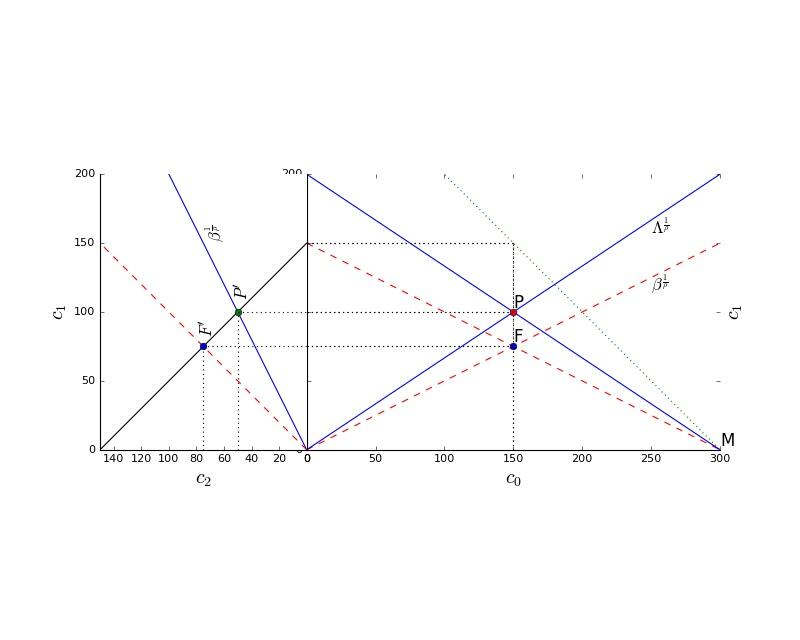

In [3]:
from IPython.display import Image, display
i = Image(filename='Figure1.jpg')
display(i)

For the CRRA case it's easy to find closed form solutions:

$$c_0^{fc} = \frac{\sum y}{1+2\beta^\frac{1}{\rho}}$$
$$c_1^{fc} = c_2^{fc} = \beta^\frac{1}{\rho} c_0^{fc} $$

#### A simple numerical example

Suppose the model parameters were as follows (and as all along $r=0$ and $\delta=1$)

In [4]:
beta = 0.5
rho = 1
Y = 300

The following function solves for period zero's optimal 'full commitment contract' using the equations above:

In [5]:
def c0fc(beta=beta, rho=rho):
    '''Full Commitment contract'''
    btr = beta**(1/rho)
    Y = 300
    c0 = Y/(1+2*btr)
    return c0, btr*c0, btr*c0

The optimal contract for these parameters is 

In [6]:
c0fc()

(150.0, 75.0, 75.0)

If the consumer had an income stream  $ y =(100, 100, 100)$ then we'd interpret this as a borrowing contract, as the period 0 consumer would want to borrow 50 in period zero andthen balance repayments between period 1 and 2.

Saving/repayments (positives) and borrowing/dissaving (negatives) in each period would be written:

In [7]:
[100, 100, 100] - np.array(c0fc())

array([-50.,  25.,  25.])

If on the other hand the consumer had an income stream  $ y =(200, 50, 50)$ then we'd interpret this as a savings contrac, with the consumer saving 50 in period zero to be shared equally between period 1 and 2 consumption.

## refinance and self-control

We recast this slightly to focus on the role of savings.  Period 0 self (henceforth 'zero-self') chooses period zero savings $s_0$ (and by implication period 0 consumption $c_0 = y_0 - s_0$).  In period 1 his later 'one-self' reacts by choosing her own preferred period 1 savings $s_1$ (or, same thing $c_1$ and by implication $c_2$).  

We need to find one-self's 'reaction function'.  They choose $c_1$ to maximize

$$u(c_{1})+\beta \delta u(c_{2})$$

subject to

$$c_1(1+r)+c_2 =y_1 (1+r) +y_2+s_0 (1+r)^2$$

The FOC give us

$$u'(c_{1})=\beta \delta(1+r) {u'(c_2)} $$

which for this CRRA case give us

$$c_{2} = [\beta \delta (1+r) ]^\frac{1}{\rho} c_1$$

Substituting this into the intertemporal budget constraint above we can solve for the reaction function:

$$ c_1(s_{0} )= \frac{s_0 (1+r)^2+y_1 (1+r) +y_2}
{(1+r)+[ \beta \delta(1+r)]^\frac{1}{\rho} }
 $$

Note that if $\delta=\frac{1}{1+r}$ and $r=0$ then this last expression simplifies to:
    
$$ c^1_1(s_{0} )= \frac{s_0+y_1 +y_2}{1 + \beta ^\frac{1}{\rho} }  $$
 
 Without loss of generality we will focus on this stripped down version of the expression.

Note that the zero-self wants each extra dollar of saving (or debt) $s_0$ that they pass on to period one that 1/2 of that dollar be for period 1 and the other half for period 2.  In other words they want

$$\frac{dc^0_1}{ds_0} = \frac{dc_2}{ds_0} =\frac{1}{2}$$

But One-self instead prefers 

$$\frac{dc^1_1}{ds_0} =\frac{1}{1+\beta^\frac{1}{\rho}} > \frac{1}{2}$$
and 
$$\frac{dc^1_2}{ds_0} =\frac{\beta^\frac{1}{\rho}}{1+\beta^\frac{1}{\rho}}<\frac{1}{2}$$

Zero-self will therefore act to strategically control how much savings is passed on, behaving much like a Stackelberg leader.

They choose $s_0$ to:
    
$$\max u(y_0-s_{0})+\beta \left[ u(c^1_1(s_0))+u(c^1_2(s_0))\right] $$

Recall that One-self will always have $c_2^1 =\beta^\frac{1}{\rho} c_1^1$ and also note that for the CRRA case we can write
$u(\beta^\frac{1}{\rho}c_1^1)=\beta^\frac{1-\rho}{\rho}u(c_1^1)$ 
so we can rewrite the objective as:

$$\max u(y_0-s_{0})+\beta (1+\beta^\frac{1-\rho}{\rho}) u(c^1_1(s_0))$$

The  FOC will therefore be:
$$u'(y_0-s_0) = \beta (1+\beta^\frac{1-\rho}{\rho}) u'(c_1^1(s_0)) \frac{dc_1^1}{ds_0}$$

$$u'(y_0-s_0) = \frac{\beta +\beta^\frac{1}{\rho}}{1+\beta^\frac{1}{\rho}} u'(c_1^1(s_0)) $$

and after some substitutions and simplifications:
$$(y_0-s_0)^{-\rho}
= \frac{ \beta+\beta^\frac{1}{\rho}}{1+\beta^\frac{1}{\rho}}
(\frac{s_0+y_1 +y_2}{1 + \beta ^\frac{1}{\rho} })^{-\rho} $$

$$   \frac{s_0+y_1 +y_2}{1 + \beta ^\frac{1}{\rho} }
= \Lambda^\frac{1}{\rho}
(y_0-s_0) $$

where $\Lambda = \frac{\beta +\beta^\frac{1}{\rho}}{1+\beta^\frac{1}{\rho}}$

Or solving for  $c_0$ :

$$c_0 = \frac{\sum y}{1+\Lambda^\frac{1}{\rho}(1+\beta^\frac{1}{\rho})} $$

Note that we can compare period 0 consumption under this 'own smoothing' situation to the full commitment situation where we have shown that:

$$c_0 = \frac{\sum y}{1+2\beta^\frac{1}{\rho}} $$

From which it's clear that savings is higher or lower depending on a comparison of the two denominators... Empirically however the difference in period 0 consumption seems very small... Most of the action is in terms of period 1 and 2 as the follownig shows.

### Visualized

As in the other notebooks we import a module that gives us a generic 'Contract' class that defines a few attributes (e.g. default parameters of the utility function, initial endowments, etc.) and useful methods to calculate profits, utility, etc.

In [8]:
def c0own(beta=beta, rho=rho):
    '''Own-smoothing contract'''
    btr = beta**(1/rho)
    lm = (beta + btr)/(1+btr)
    c0 = Y/(1+(1+btr)*lm**(1/rho))
    c1 = (Y-c0)/(1+btr)
    c2 = btr*c1
    return c0, c1, c2
    
    
def plotC(rho=rho):
    bt = np.linspace(0,1, 100)
    fig, ax = plt.subplots(figsize=(7,6))
    c0F,c1F,c2F = c0fc(bt, rho)
    c0o,c1o,c2o = c0own(bt, rho)
    ax.plot(bt, c0F)
    ax.plot(bt, c1F)
    ax.plot(bt, c0F+c1F,'r')
    ax.plot(bt, c0o,'--')
    ax.plot(bt, c1o,'--')
    ax.plot(bt, c0o+c1o,'r--')
    ax.plot(bt, c2o,'--')
    fig.suptitle(r'$\rho$ = {}'.format(rho),fontsize=18)
    ax.set_xlabel(r'$\beta$', fontsize=16)
    plt.grid()
    plt.show()
    return

In [9]:
c0fc(beta, rho)

(150.0, 75.0, 75.0)

In [10]:
c0own()

(150.0, 100.0, 50.0)

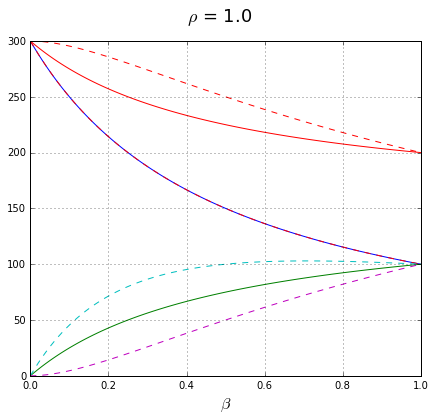

<function __main__.plotC>

In [11]:
interact(plotC,y0=(1,150,1),y1=(1,150,1),rho=(0.1,3,0.05))

## Best response function, and Stackelberg

In [12]:
def c1br(c0, beta=beta, rho=rho):
    '''One Selfs best response to Zero-self contract '''
    btr = beta**(1/rho)
    c11 = (Y - c0)/(1+btr)
    c12 = btr*c11
    return c0,c11,c12
    
def c0rp(beta=beta, rho=rho):
    '''Zero's Stackelberg contract '''
    btr = beta**(1/rho)
    lam = (beta + btr)/(1+btr)
    lmr = lam**(1/rho)
    c00rp = Y/(1+(1+btr)*lmr)
    c01rp = lmr*c00rp
    c02rp = btr*c01rp
    return c00rp, c01rp, c02rp 

In [13]:
c0fc()

(150.0, 75.0, 75.0)

In [14]:
cc = np.linspace(0,300,300)

In [15]:
cc = np.linspace(0,300, 100)
btr = beta**(1/rho)
lam = (beta + btr)/(1+btr)
lmr = lam**(1/rho)

## Two-quadrant plot

In [16]:
def bdplot(beta=beta, rho=rho, fc = True, rp = True, figname='Figure'):
    '''Plot two quadrant diagram representation. The flag fc and rp allow us to turn on
    or supress full commit or '''
    ymax = 200
    aspect = 1
    cfc = c0fc(beta=beta, rho=rho)
    crp = c0rp(beta=beta, rho=rho)
    fontsize = 18
    
    btr = beta**(1/rho)
    lam = (beta + btr)/(1+btr)
    lmr = lam**(1/rho)

    fig = plt.figure()
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2]) 

    ax0 = plt.subplot(gs[1])
    #ax0.set_title(r'$\beta=$ {:2.2f} $\rho=$ {:2.2f}'.format(beta, rho))
    ax0.set_ylim(0, ymax)
    ax0.yaxis.set_label_position("right")
    #ax0.yaxis.tick_right()
    ax0.set_xlabel(r'$c_0$', fontsize=fontsize)
    ax0.set_ylabel(r'$c_1$', fontsize=fontsize)
    ax0.text(Y,3,'M',fontsize=15)

    ax1 = plt.subplot(gs[0])
    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_label_position('left')
    ax1.set_ylabel(r'$c_1$', fontsize=fontsize)
    #ax1.set_title(r'$c^f =$ ({:3.1f}, {:3.1f}, {:3.1f})'.format(cfc[0],cfc[1],cfc[2]))
    
    if fc:
        fcstyle = '--'
        fccolor = 'r'
        if fc and not rp:
            linestyle = '-'
        ax0.plot(cc, 0.5*(Y-cc),'r--', label='Zero FC future')
        ax0.plot(cc, btr*cc, linestyle=fcstyle, color = fccolor, label='FC smooth')
        ax0.plot(cfc[0],cfc[1], marker='o')
        ax0.plot(cc, Y-cc, ':', label = 'Future net income')
        ax0.text(cfc[0],cfc[1]+3,'F',fontsize=15)
        ax1.plot(cc, (Y-cfc[0])-cc,'k-')
        ax1.plot(cc, cc*btr**(-1),'b-')
        ax1.plot(cc, cc,'r--')
        ax1.plot(cfc[2], cfc[1],marker='o')
        ax1.text(cfc[2]+4,cfc[1]+8,r"$F$",fontsize=15, rotation='vertical')
        ax0.text(250, btr*230, r'$\beta^\frac{1}{\rho}$', fontsize=15)
        xx = [cfc[0]]
        yy = [cfc[1]]
        zz = [cfc[2]]
        [ax0.plot([dot_c0, dot_c0], [0, dot_c1],':',linewidth = 1,color='black' ) for dot_c0, dot_c1 in zip(xx,yy) ] 
        [ax0.plot([0, dot_c0], [dot_c1, dot_c1],':',linewidth = 1,color='black' ) for dot_c0, dot_c1 in zip(xx,yy) ]
        [ax0.plot([0, dot_c0], [dot_c1, dot_c1],':',linewidth = 1,color='black' ) for dot_c0, dot_c1 in zip(xx,yy) ]
        [ax0.plot([dot_c0, dot_c0], [dot_c1, Y-dot_c0],':',linewidth = 1,color='black' ) for dot_c0, dot_c1 in zip(xx,yy) ]
        [ax0.plot([dot_c0, 0], [Y-dot_c0, Y-dot_c0],':',linewidth = 1,color='black' ) for dot_c0, dot_c1 in zip(xx,yy) ]
        [ax1.plot([dot_c2, dot_c2], [0, dot_c1],':',linewidth = 1,color='black' ) for dot_c1, dot_c2 in zip(yy,zz) ]
        [ax1.plot([dot_c2,0], [dot_c1, dot_c1],':',linewidth = 1,color='black' ) for dot_c1, dot_c2 in zip(yy,zz) ]

    if rp:
        ax0.plot(cc, c1br(cc, beta, rho)[1],'b-', label = 'One BR')
        ax0.plot(cc, lmr*cc,'b-', label='Stackelberg')
        ax0.plot(crp[0],crp[1],marker='o')    
        ax0.text(250, lmr*235, r'$\Lambda^\frac{1}{\rho}$', fontsize=15)
        ax0.text(crp[0],crp[1]+3,'P',fontsize=15)
        ax1.text(crp[2]+4,crp[1]+10,r"$P$",fontsize=15, rotation='vertical')
        ax1.plot(crp[2], crp[1],marker='o')
        xx = [crp[0]]
        yy = [crp[1]]
        zz = [crp[2]]
        [ax0.plot([dot_c0, dot_c0], [0, dot_c1],':',linewidth = 1,color='black' ) for dot_c0, dot_c1 in zip(xx,yy) ] 
        [ax0.plot([0, dot_c0], [dot_c1, dot_c1],':',linewidth = 1,color='black' ) for dot_c0, dot_c1 in zip(xx,yy) ]
        [ax0.plot([0, dot_c0], [dot_c1, dot_c1],':',linewidth = 1,color='black' ) for dot_c0, dot_c1 in zip(xx,yy) ]
        [ax0.plot([dot_c0, dot_c0], [dot_c1, Y-dot_c0],':',linewidth = 1,color='black' ) for dot_c0, dot_c1 in zip(xx,yy) ]
        [ax0.plot([dot_c0, 0], [Y-dot_c0, Y-dot_c0],':',linewidth = 1,color='black' ) for dot_c0, dot_c1 in zip(xx,yy) ]
        [ax1.plot([dot_c2, dot_c2], [0, dot_c1],':',linewidth = 1,color='black' ) for dot_c1, dot_c2 in zip(yy,zz) ]
        [ax1.plot([dot_c2,0], [dot_c1, dot_c1],':',linewidth = 1,color='black' ) for dot_c1, dot_c2 in zip(yy,zz) ]

    ax1.set_ylim(0,ymax)
    ax1.set_xlim(0,150)
    ax1.invert_xaxis()
    ax1.set_xlabel('$c_2$', fontsize=fontsize)

    for side in ['right','top']:
        ax0.spines[side].set_visible(False)
        ax1.spines[side].set_visible(False)

    #scaling and grid    
    ax0.set_aspect(aspect)
    ax1.set_aspect(1)
    #ax0.grid()
    #ax1.grid()

    #ax0.text(20, 0.5*(Y-50), r'$\frac{1}{2}\sum (y-c_0)$', fontsize=14)
    #ax0.text(20, (1/(1+btr))*(Y-30), r'$\frac{1}{1+\beta^\frac{1}{\rho}}\sum (y-c_0)$', fontsize=14)

    ax1.text(btr*150, 150,  r'$\beta^\frac{1}{\rho}$', fontsize=15, rotation='vertical')


    fig.subplots_adjust(wspace=0)
    plt.show()
    fig.savefig(figname+'.png', format='png')
    return

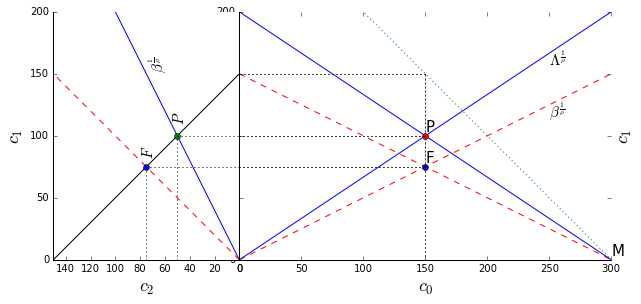

In [17]:
bdplot(fc=True, rp=True, figname='Figure1')

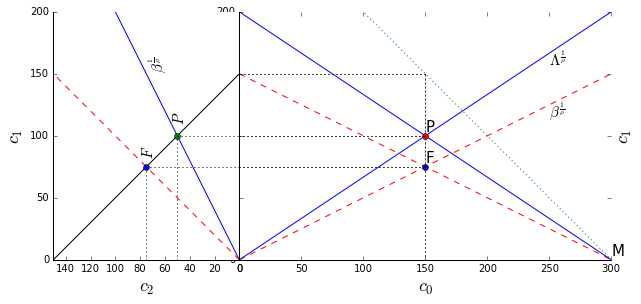

<function __main__.bdplot>

In [18]:
interact(bdplot,beta=(0.1,1,0.05),rho=(0.1,3,0.05))

In [19]:
cCF =np.array(c0fc(beta=0.5))
cCF

array([ 150.,   75.,   75.])

In [20]:
cCR = np.array(c0own(beta=0.5))
cCR

array([ 150.,  100.,   50.])

In [21]:
import Contract

In [22]:
cC = Contract.Competitive(beta=0.5)
cC.rho = 0.99
cC.print_params()

beta    : 0.5
delta   : 1.0
guess   : [100 100 100]
kappa   : 0
r       : 0.0
rho     : 0.99
y       : [100 100 100]


In [23]:
cCF = cC.fcommit()
cCF[1:3]

array([ 74.74,  74.74])

In [24]:
c0own(cC.beta, cC.rho)

(150.57014747879336, 99.85212555140448, 49.57772696980215)

In [30]:
cCRP = cC.reneg_proof().x

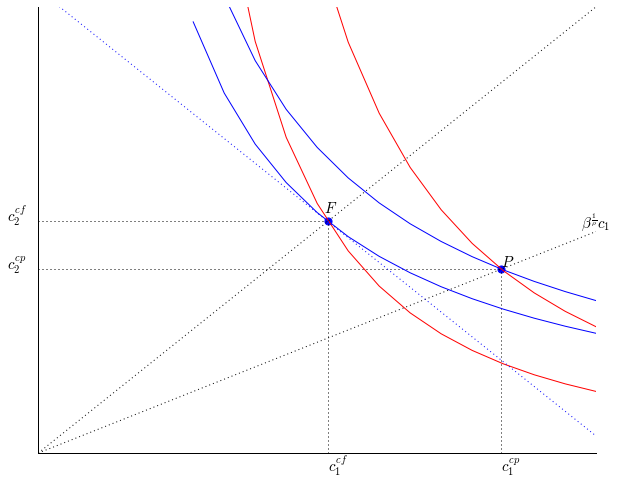

In [31]:
plt.rcParams["figure.figsize"] = (10, 8)
c1min = 0
c1max = 160
c1 = np.arange(0,c1max,c1max/20)
c1_ = np.arange(40,c1max,c1max/20)
y = cC.y
#cCRP = cCRPa
#indifference curves functions
ubar0 = cC.PVU(cCF[1:3], 1.0)
idc0 = cC.indif(ubar0, 1.0)
ubar1 = cC.PVU(cCF[1:3],cC.beta)
idc1 = cC.indif(ubar1,cC.beta)
ubar0RP = cC.PVU(cCRP[1:3], 1.0)
idc0RP = cC.indif(ubar0RP,1.0)
ubar1RP = cC.PVU(cCRP[1:3], cC.beta)
idc1RP = cC.indif(ubar1RP,cC.beta)


fig, ax = plt.subplots()
# trick to display contract points and coordinate lines http://bit.ly/1CaTMDX
xx = [cCF[1], cCRP[1]]
yy = [cCF[2], cCRP[2]]
plt.scatter(xx,yy, s=50, marker='o',color='b')
[plt.plot([dot_x, dot_x] ,[0, dot_y],':',linewidth = 1,color='black' ) for dot_x, dot_y in zip(xx,yy) ] 
[plt.plot([0, dot_x] ,[dot_y, dot_y],':',linewidth = 1,color='black' ) for dot_x, dot_y in zip(xx,yy) ]

# indifference curves
plt.plot(c1_,idc0(c1_),color='blue')          
plt.plot(c1_,idc1(c1_),color='red') 
plt.plot(c1_,idc0RP(c1_),color='blue')
plt.plot(c1_,idc1RP(c1_),color='red')
# rays
plt.plot(c1, c1,':',color='black')
plt.plot(c1, cC.beta**(1/cC.rho)*c1,':',color='black')
# isoprofit line(s)
isoprofline = cC.isoprofit(cC.profit(cCF,cC.y)-(y[0]-cCF[0]), y)
plt.plot(c1,  isoprofline(c1),':' )

ax.spines['right'].set_color('none'), ax.spines['top'].set_color('none')
plt.ylim((c1min, c1max*0.9)), plt.xlim((c1min, c1max*0.9))
ax.xaxis.tick_bottom(),ax.yaxis.tick_left()
plt.xlabel('$c_{1}$'); plt.ylabel('$c_{2}$')

# label the points
ax.text(cCF[1]-1, cCF[2]+3, r"$F$", fontsize=15)
ax.text(cCRP[1], cCRP[2]+1, r"$P$", fontsize=15)
ax.text(cCRP[1], -6, r'$c^{cp}_{1}$', fontsize=15)
ax.text(-8, cCRP[2], r'$c^{cp}_{2}$', fontsize=15)
ax.text(cCF[1], -6, r'$c^{cf}_{1}$', fontsize=15)
ax.text(-8, cCF[2], r'$c^{cf}_{2}$', fontsize=15)
ax.text(140, btr*145, r'$\beta^\frac{1}{\rho}c_1$', fontsize=15)

#ax.text(0, -10, r'Competitive $\kappa = {}$'
#        .format(cC.kappa), fontsize=12)
#ax.text(0, -15, r'$\beta = {}, \  \rho = {}$'
#        .format(cC.beta, cC.rho), fontsize=12)

# isoprofit lines could be plotted like so
#isop  = cC.isoprofit( cC.kappa, cCRP)   # returns a function of c1 
#plt.plot(c1_, isop(c1_),':')
#turn off the axis numbers
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.savefig('figs\Figure2.pdf', format='pdf')
plt.show()